# Task 3 Unsupervised Learning


Unsupervised learning is a type of machine learning that looks for previously undetected patterns in a data set with no pre-existing labels and with a minimum of human supervision. In contrast to supervised learning that usually makes use of human-labeled data, unsupervised learning, also known as self-organization allows for modeling of probability densities over inputs. It forms one of the three main categories of machine learning, along with supervised and reinforcement learning.

In [25]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading the Data

In [26]:
data = pd.read_csv('Iris.csv')

Exploring the data

In [27]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [29]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F761D89BC8>,
      dtype=object)

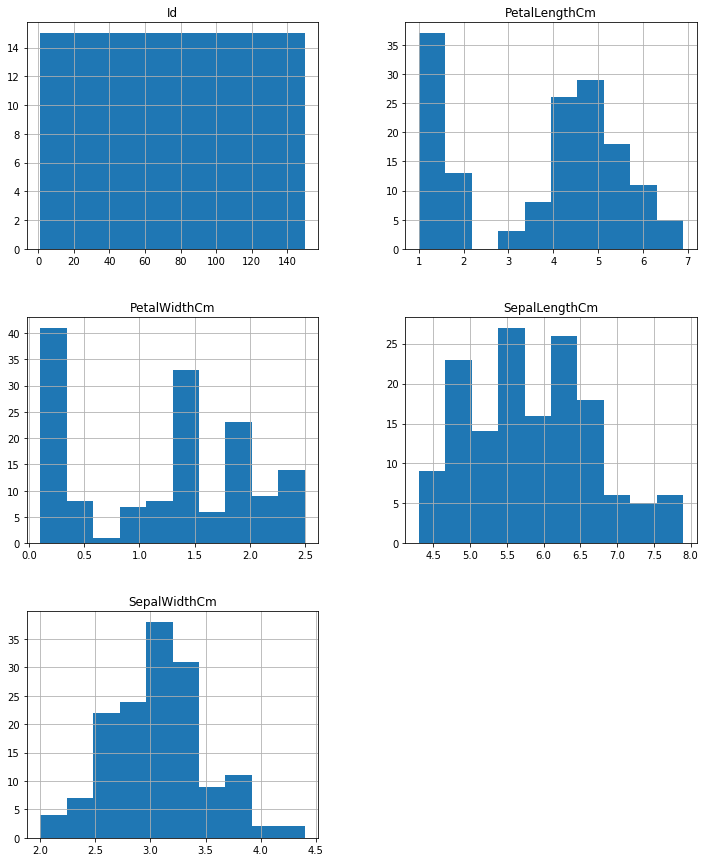

In [30]:
data.hist(figsize=(12,15))

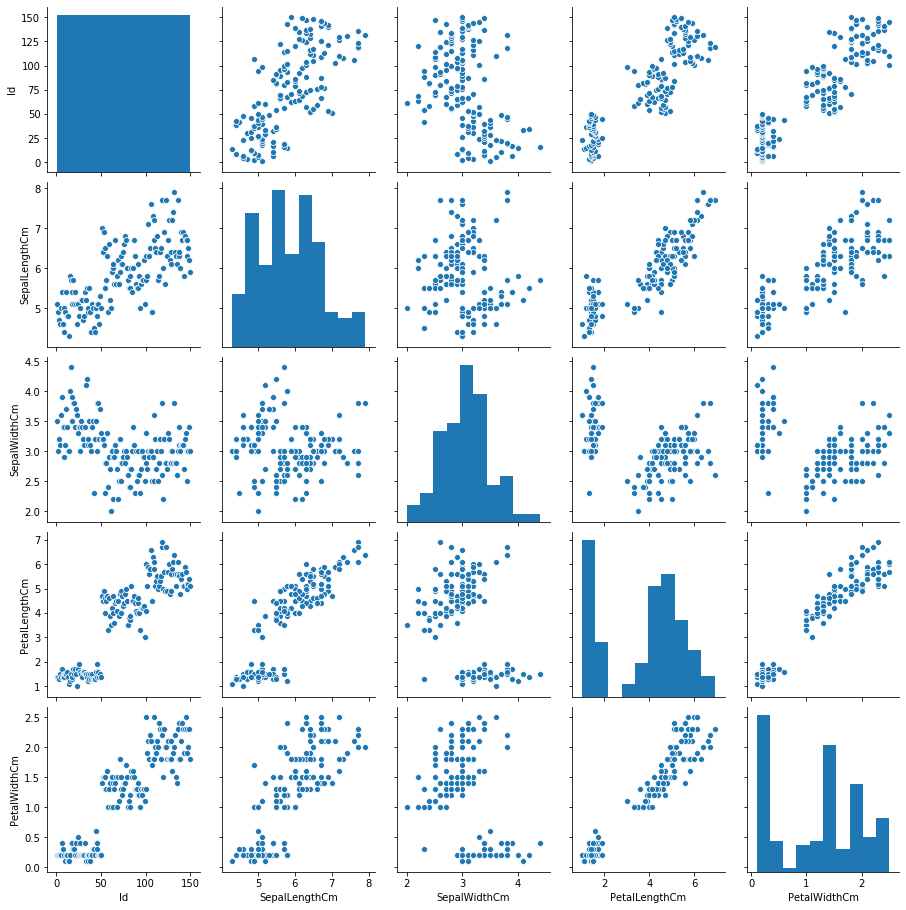

In [16]:
sns.pairplot(data)

Exploring the data

In [17]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# Finding the clusters using the K-means algorithm

K Means Clustering tries to cluster your data into clusters based on their similarity. In this algorithm, we have to specify the number of clusters (which is a hyperparameter) we want the data to be grouped into.K-means uses an iterative refinement method to produce its final clustering based on the number of clusters defined by the user (represented by the variable K) and the dataset. For example, if you set K equal to 3 then your dataset will be grouped in 3 clusters, if you set K equal to 4 we will group the data in 4 clusters, and so on.

In [38]:
data1 = data.iloc[:, [1,2,3,4]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(data1)
    wcss.append(kmeans.inertia_)

Plotting the elbow curve

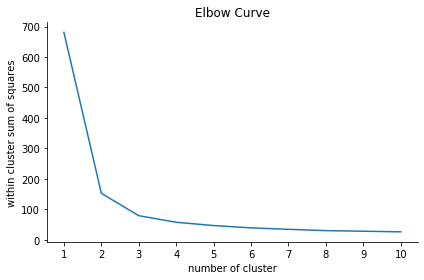

In [39]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Curve')
plt.xlabel('number of cluster')
plt.ylabel('within cluster sum of squares')
plt.tight_layout()
plt.xticks(range(1,11))
ab = plt.gca()
ab.spines['top'].set_visible(False)
ab.spines['right'].set_visible(False)
plt.show()

In [37]:
data2= data.iloc[:,1:4].values
k = KMeans(n_clusters=3)
km = k.fit(data2)
predict = km.predict(data2)

Applying KMeans cluster method

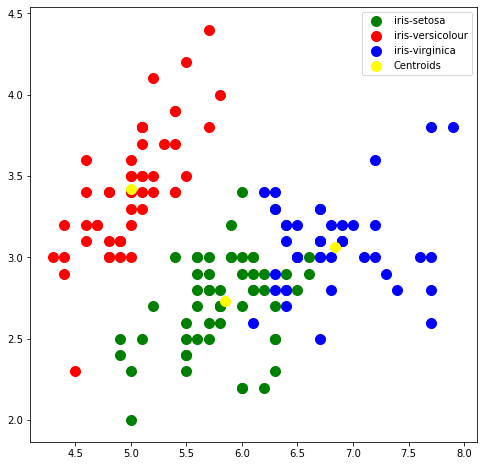

In [24]:
plt.figure(figsize = (8,8))
plt.scatter(data1[predict == 0,0], data1[predict == 0,1],s = 100, c = 'green', label = 'iris-setosa')
plt.scatter(data1[predict == 1,0], data1[predict == 1,1],s = 100, c ='red', label = 'iris-versicolour')
plt.scatter(data1[predict == 2,0], data1[predict == 2,1],s = 100, c = 'blue', label = 'iris-virginica')


plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1],
           s = 100, c = 'yellow', label = 'Centroids')
plt.legend(loc = 'upper right')
plt.show()
